In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
#imports
import src.preprocessing as pre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [63]:
meta, y, mapping_dict = pre.load_data('../data/planting_meta.json','../data/y.csv','../data/mapping_dict.json')

In [4]:
hf = y.iloc[:,:20]
hf_normalized = hf.div(hf.sum(axis=1), axis=0)
z_scores = hf_normalized.apply(zscore)
outliers = z_scores.abs() > 3

In [5]:
outliers_idx = hf[outliers.any(axis=1)].index

In [6]:
meta['outlier_z_score_prop'] = meta.index.isin(outliers_idx).astype(int)

In [7]:
meta['Total_Kilos'] = y.sum(axis=1)

In [8]:
meta['Num_Harvests'] = hf.apply(lambda x: len(np.nonzero(x)[0]),axis=1)

In [9]:
meta['FirstHarvest'] = hf.apply(lambda x: np.nonzero(x)[0][0],axis=1)

In [10]:
meta['Yield'] = meta['Total_Kilos'] / meta['Ha']

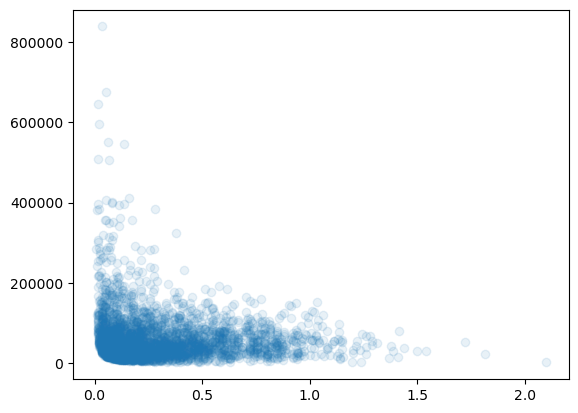

In [11]:
plt.scatter(meta.Ha,meta.Yield,alpha=0.1)

In [55]:
meta['Covered'] = meta.Num_Harvests + meta.FirstHarvest

In [56]:
meta['CoverageOutlier'] = meta.Covered < 18
meta['NumHarvestOutlier'] = 2*(meta.Num_Harvests<6).astype(int)

In [57]:
meta['Yield_Outlier'] = 2*np.logical_or(meta.Yield < 8000, meta.Yield > 200000).astype(int)
meta['FirstHarvestOutlier'] = meta.FirstHarvest > 13


In [58]:
meta['NumOutliers'] = meta[['CoverageOutlier',
       'NumHarvestOutlier', 'Yield_Outlier', 'FirstHarvestOutlier','outlier_z_score_prop']].sum(axis=1)

In [62]:
good_ones = meta[meta['NumOutliers']<2].index

In [71]:
new_meta, new_y, mapping_dict = pre.load_data('../data/planting_meta.json','../data/y.csv','../data/mapping_dict.json')

In [72]:
new_meta = new_meta.loc[good_ones]
new_y = new_y.loc[good_ones]

In [74]:
new_meta.to_json('meta.json', orient='split')
new_y.to_csv('y.csv')